# Model Doğrulama ve Son Kontroller

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
data = load_boston()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["PRICE"] = data.target

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [202]:
X = df.drop("PRICE", axis=1)
y= df["PRICE"]

---
---
## Lineer Regresyon ve Model Oluşturma

In [203]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(X, y)
lin_final_pred= lin_regr.predict(X)

In [204]:
print("R^2 :       ", round(r2_score(y,lin_final_pred),2))
print("MAE :       ", round(mean_absolute_error(y,lin_final_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y,lin_final_pred)),2))

R^2 :        0.74
MAE :        3.27
RMSE :       4.68


In [205]:
type(lin_final_pred)

numpy.ndarray

In [206]:
type(y)

pandas.core.series.Series

In [207]:
lin_final_val = pd.Series(lin_final_pred)

In [208]:
type(lin_final_val)

pandas.core.series.Series

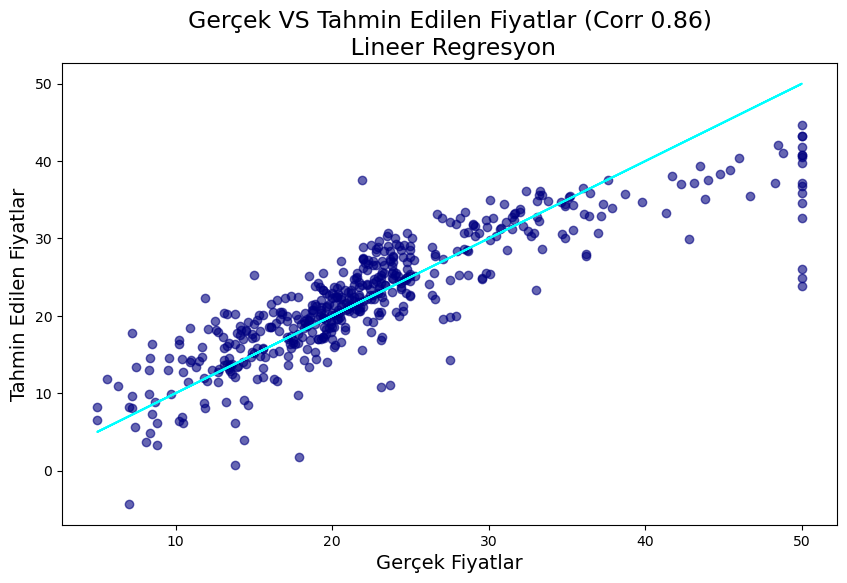

In [209]:
plt.figure(figsize=(10,6))
plt.scatter(x=y, y=lin_final_val, c='navy', alpha=0.6)
plt.plot(y, y, color='cyan')

corr = round(y.corr(lin_final_val), 2)

plt.xlabel('Gerçek Fiyatlar', fontsize=14)
plt.ylabel('Tahmin Edilen Fiyatlar', fontsize=14)
plt.title(f'Gerçek VS Tahmin Edilen Fiyatlar (Corr {corr})\n Lineer Regresyon', fontsize=17);

---
---
## Residuals

In [210]:
residuals_lin = lin_final_val - y
type(residuals_lin)

pandas.core.series.Series

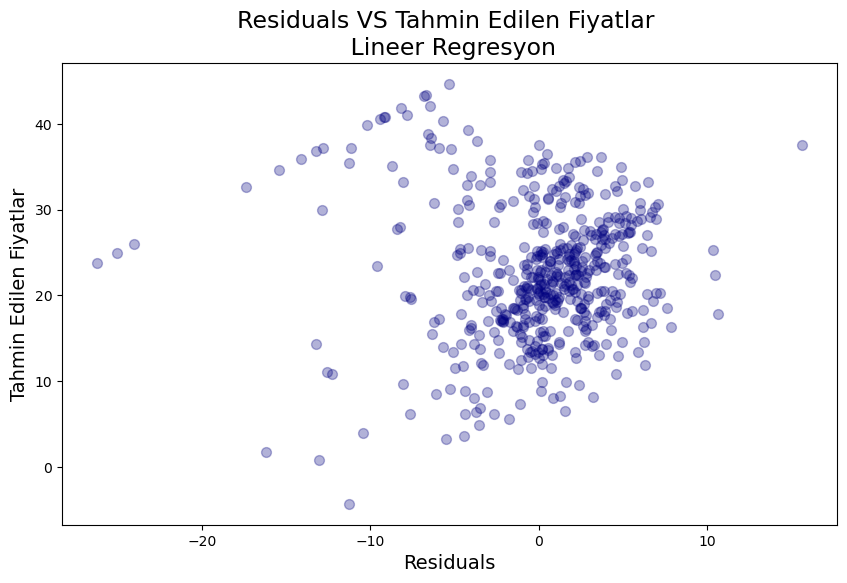

In [211]:
plt.figure(figsize=(10,6))

plt.scatter(x=residuals_lin, y=lin_final_val, c='navy', alpha=0.3, s=50)

plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Tahmin Edilen Fiyatlar', fontsize=14)
plt.title(f'Residuals VS Tahmin Edilen Fiyatlar \n Lineer Regresyon', fontsize=17);


---
---
## Polynomial Regression

In [212]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

poly_conv = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_conv.fit_transform(X)
final_model = LinearRegression(fit_intercept=True)
final_model.fit(poly_x, y)
final_pred = final_model.predict(poly_x)

In [213]:
print("R^2 :       ", round(r2_score(y,final_pred),2))
print("MAE :       ", round(mean_absolute_error(y,final_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y,final_pred)),2))

R^2 :        0.93
MAE :        1.81
RMSE :       2.45


___
___

## Tahmin Edilen Değerler VS Gerçek Değerler

In [214]:
type(final_pred)

numpy.ndarray

In [215]:
type(y)

pandas.core.series.Series

In [216]:
final_val = pd.Series(final_pred)

In [217]:
type(final_val)

pandas.core.series.Series

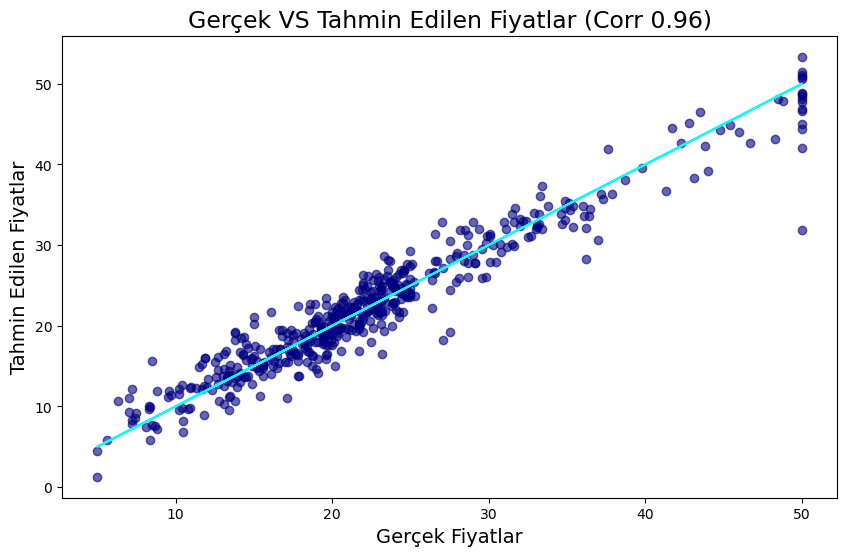

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(x=y, y=final_val, c='navy', alpha=0.6)
plt.plot(y, y, color='cyan')

corr = round(y.corr(final_val), 2)

plt.xlabel('Gerçek Fiyatlar', fontsize=14)
plt.ylabel('Tahmin Edilen Fiyatlar', fontsize=14)
plt.title(f'Gerçek VS Tahmin Edilen Fiyatlar (Corr {corr})', fontsize=17);

---
---
## Residuals

In [219]:
residuals = final_val - y
type(residuals)

pandas.core.series.Series

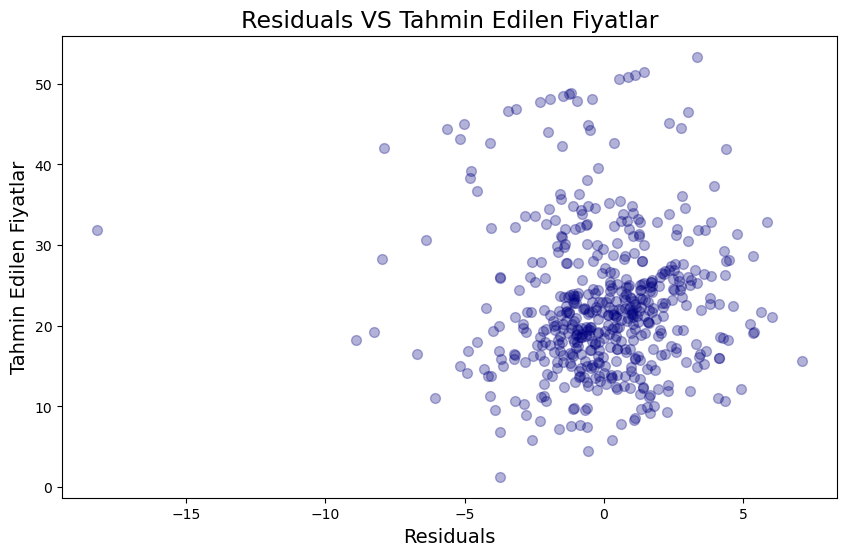

In [220]:
plt.figure(figsize=(10,6))

plt.scatter(x=residuals, y=final_val, c='navy', alpha=0.3, s=50)

plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Tahmin Edilen Fiyatlar', fontsize=14)
plt.title(f'Residuals VS Tahmin Edilen Fiyatlar', fontsize=17);


---
## Model Deneme

In [221]:
X.iloc[32], y.iloc[32]

(CRIM         1.38799
 ZN           0.00000
 INDUS        8.14000
 CHAS         0.00000
 NOX          0.53800
 RM           5.95000
 AGE         82.00000
 DIS          3.99000
 RAD          4.00000
 TAX        307.00000
 PTRATIO     21.00000
 B          232.60000
 LSTAT       27.71000
 Name: 32, dtype: float64,
 13.2)

In [222]:
bizim_ev = X.iloc[32].values

In [223]:
bizim_ev

array([  1.38799,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.95   ,
        82.     ,   3.99   ,   4.     , 307.     ,  21.     , 232.6    ,
        27.71   ])

In [224]:
type(bizim_ev)

numpy.ndarray

### Lineer

In [225]:
type(X.iloc[32])

pandas.core.series.Series

In [226]:
lin_regr.predict([bizim_ev])

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.81105736])

In [227]:
bizim_ev.shape

(13,)

### Polinom

In [228]:
poly_ev = poly_conv.fit_transform([bizim_ev])

In [229]:
type(poly_ev)

numpy.ndarray

In [230]:
final_model.predict(poly_ev)

array([16.85840452])

----
### Modeli Kaydetmek

In [231]:
from joblib import dump, load

In [240]:
dump(final_model, "ev_fiyat.joblib")

['ev_fiyat.joblib']

In [241]:
sahibinden_satilik = load("ev_fiyat.joblib")

In [244]:
sahibinden_satilik.predict(poly_ev)

array([16.85840452])

___

# **https://www.youtube.com/watch?v=8NQTXGFGyfg**